<a href="https://colab.research.google.com/github/HinaNitano/EU_M_Math/blob/main/Chap03_Cm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import requests, zipfile
from io import StringIO
import io

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# データがあるURLの指定
url = 'https://archive.ics.uci.edu/static/public/186/wine+quality.zip'

# データをURLから取得する
r = requests.get(url, stream=True)

# Zipfileを読み込み、展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [3]:
ls

sample_data/  winequality.names  winequality-red.csv  winequality-white.csv


In [4]:
# データの読み込み
wine_data_red = pd.read_csv('winequality-red.csv', sep=';')

In [5]:
# どんなデータがあるのかざっと見る
wine_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# 要約統計量
wine_data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# CSVファイルに保存
wine_data_red.describe().to_csv('winequality-red_describe.csv')

In [8]:
# サンプルサイズ
sample_size = 100

# 抽出対象の列名
target_column_names = ['fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar',
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                        'pH', 'sulphates', 'alcohol', 'quality']

# ランダムサンプリング
random_sample = wine_data_red[target_column_names].sample(sample_size)

In [9]:
# CSVファイルに保存
random_sample.to_csv('winequality-red_random_sample.csv')

In [10]:
# データの読み込み
wine_data_red_random_sample = pd.read_csv('winequality-red_random_sample.csv')

# どんなデータがあるのかざっと見る
wine_data_red_random_sample.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.9924,3.57,0.85,13.0,7
1,630,8.7,0.540,0.26,2.5,0.097,7.0,31.0,0.9976,3.27,0.60,9.3,6
2,396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.9994,3.47,0.53,9.9,5
3,635,8.7,0.840,0.00,1.4,0.065,24.0,33.0,0.9954,3.27,0.55,9.7,5
4,435,12.3,0.390,0.63,2.3,0.091,6.0,18.0,1.0004,3.16,0.49,9.5,5


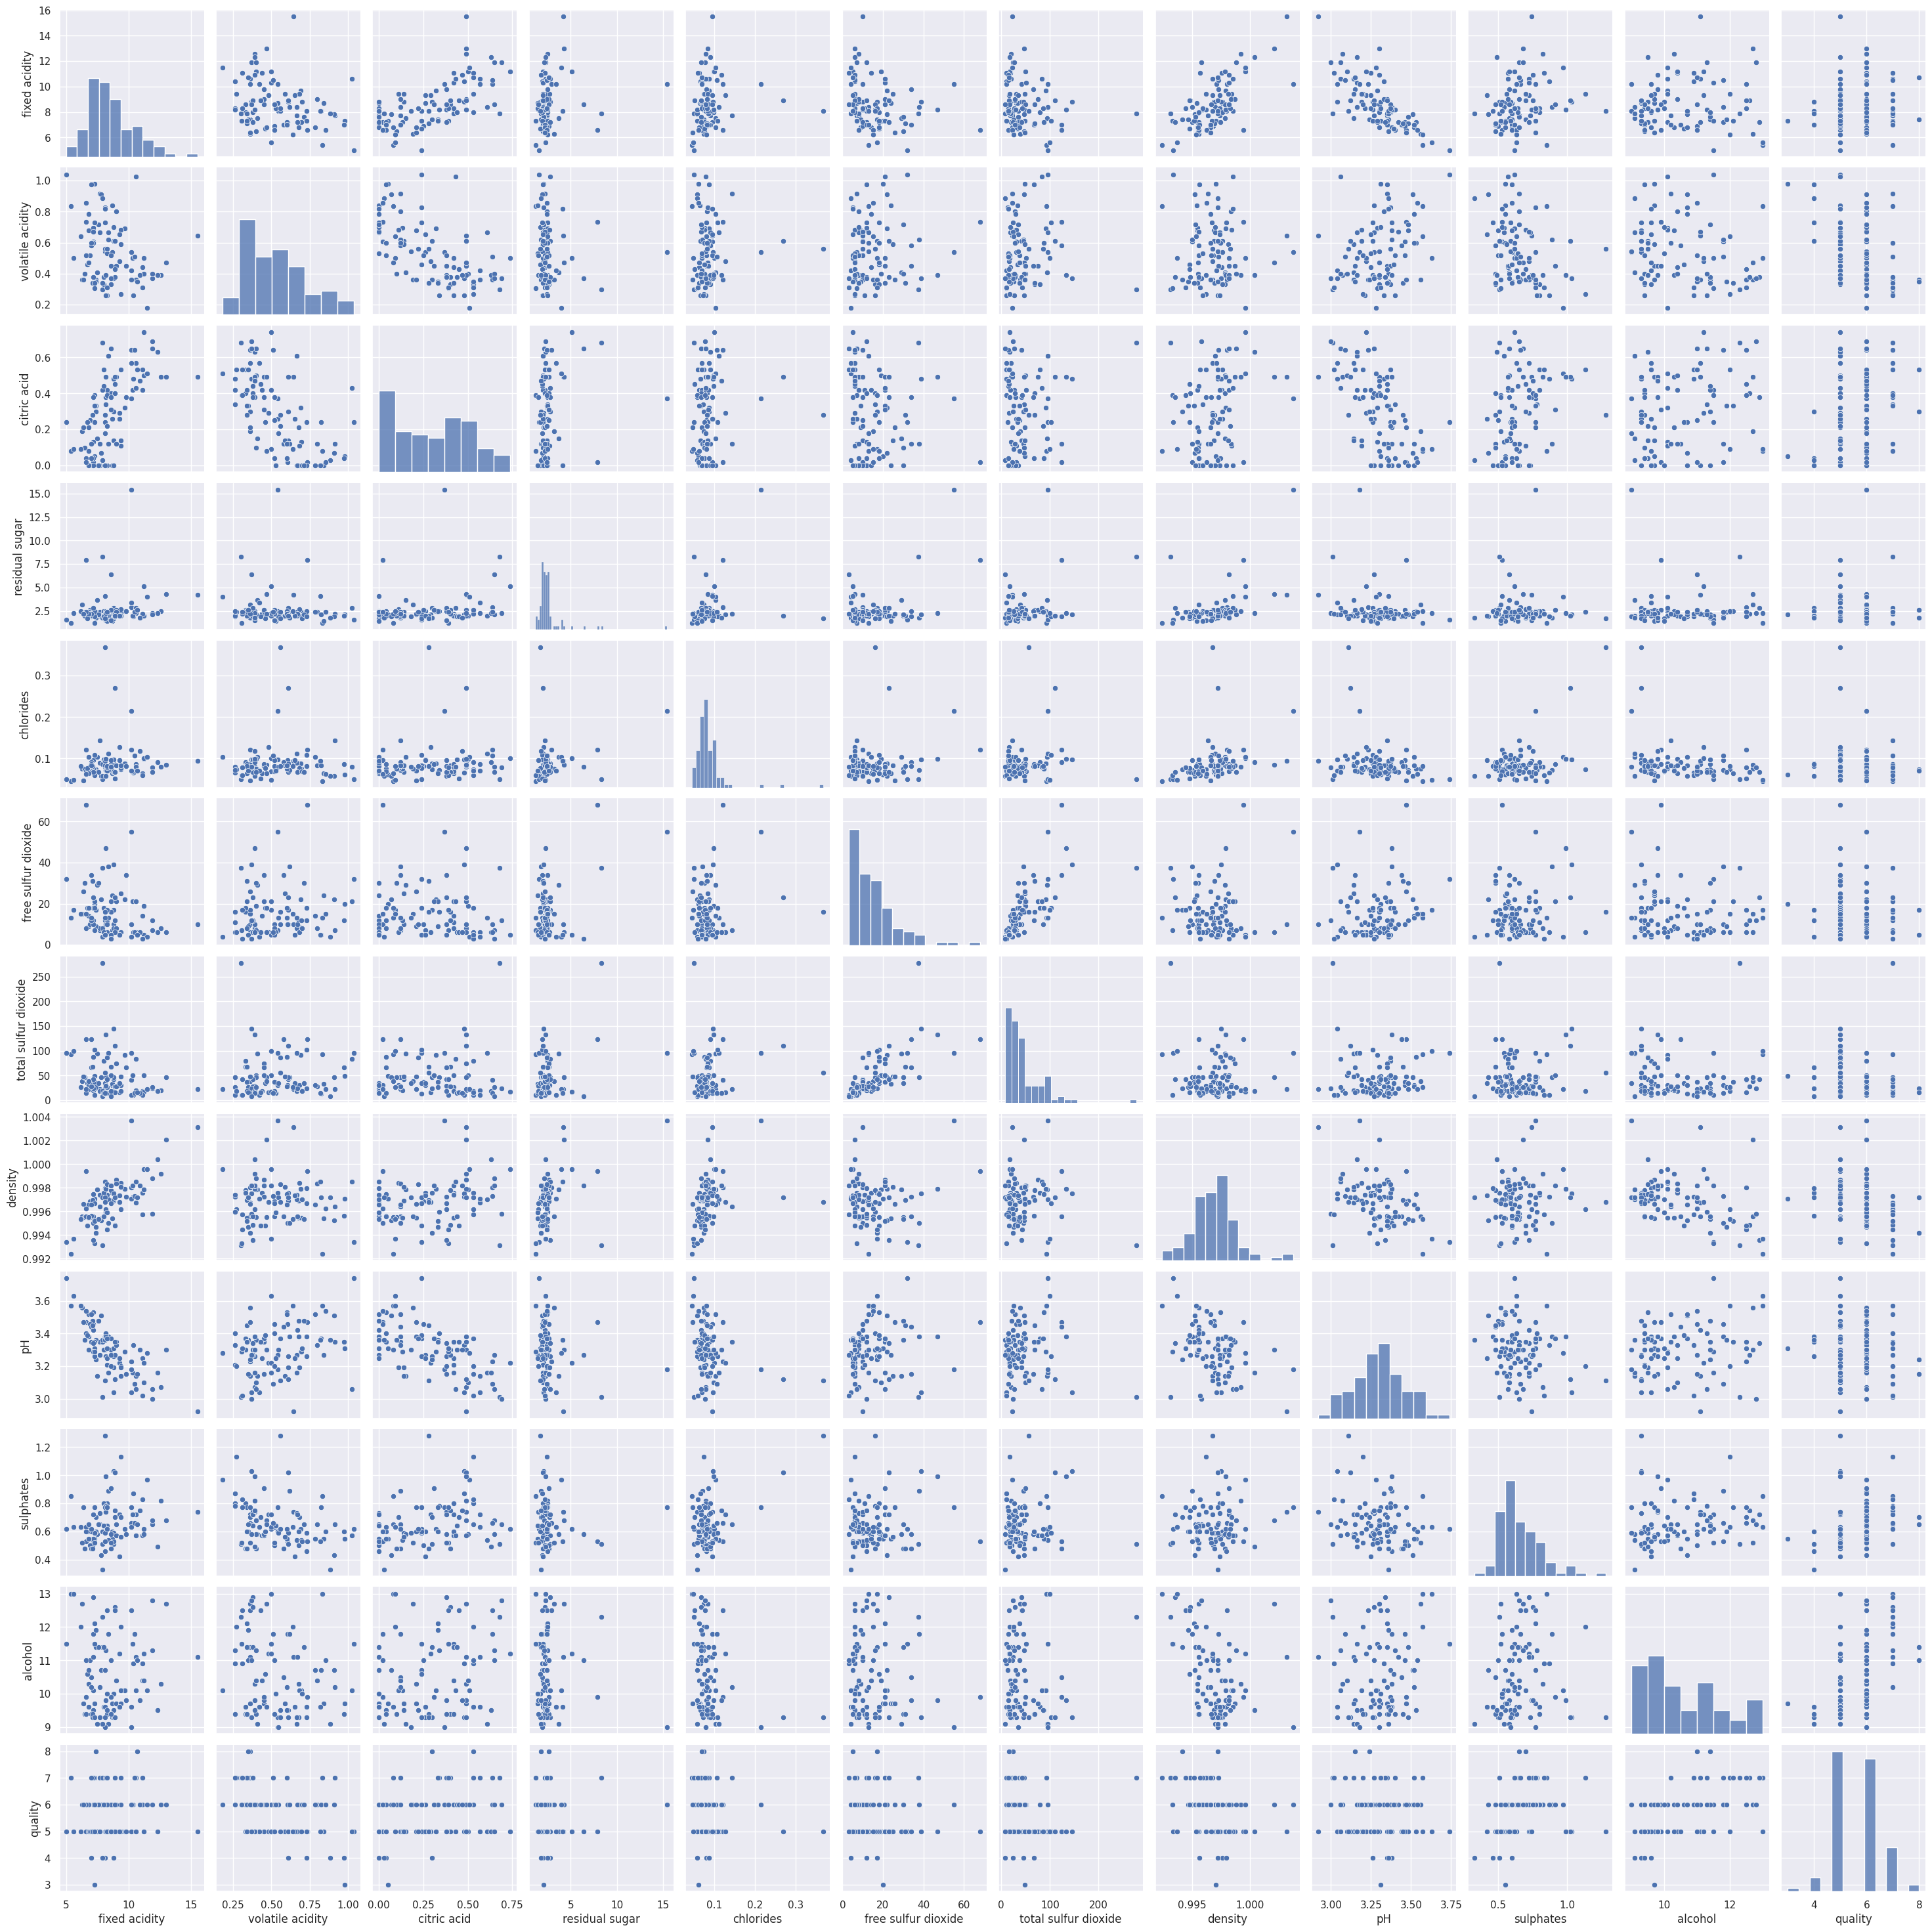

In [11]:
sns.pairplot(wine_data_red_random_sample[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                            'pH', 'sulphates', 'alcohol', 'quality']])
plt.grid(True)